In [1]:
# Импорт библиотек

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.metrics.regression import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, Lasso
from sklearn.ensemble import RandomForestRegressor

import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv('places.csv')

In [3]:
# Заголовки
df.head()

,Climate_and_Terrain,Housing,Health_Care_and_Environment,Crime,Transportation,Education,The_Arts,Recreation,Economics,Place
0,521,6200,237,923,4031,2757,996,1405,7633,Abilene_TX
1,575,8138,1656,886,4883,2438,5564,2632,4350,Akron_OH
2,468,7339,618,970,2531,2560,237,859,5250,Albany_GA
3,476,7908,1431,610,6883,3399,4655,1617,5864,Albany-Schenectady-Troy_NY
4,659,8393,1853,1483,6558,3026,4496,2612,5727,Albuquerque_NM


In [4]:
df.shape

(327, 10)

In [5]:
df.columns

Index(['Climate_and_Terrain', 'Housing', 'Health_Care_and_Environment',
       'Crime', 'Transportation', 'Education', 'The_Arts', 'Recreation',
       'Economics', 'Place'],
      dtype='object')

In [6]:
names = ['Climate_and_Terrain', 'Housing', 'Health_Care_and_Environment',
       'Crime', 'Transportation', 'Education', 'The_Arts', 'Recreation',
       'Economics', 'Place']
df.columns = names

In [7]:
for column in range(0, 10):
    if column not in [6]:
        df[names[column]] = df[names[column]].astype("category")

In [8]:
df.dtypes

Climate_and_Terrain            category
Housing                        category
Health_Care_and_Environment    category
Crime                          category
Transportation                 category
Education                      category
The_Arts                          int64
Recreation                     category
Economics                      category
Place                          category
dtype: object

In [9]:
dfB = pd.get_dummies(df)

In [10]:
dfB.head()

,The_Arts,Climate_and_Terrain_105,Climate_and_Terrain_148,Climate_and_Terrain_149,Climate_and_Terrain_193,Climate_and_Terrain_195,Climate_and_Terrain_238,Climate_and_Terrain_257,Climate_and_Terrain_276,Climate_and_Terrain_293,...,Place_Wichita_Falls_TX,Place_Wichita_KS,Place_Williamsport_PA,Place_Wilmington_DE-NJ-MD,Place_Wilmington_NC,Place_Worcester_MA,Place_Yakima_WA,Place_York_PA,Place_Youngstown-Warren_OH,Place_Yuba_City_CA
0,996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5564,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,237,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4655,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4496,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Отделение целевого признака
X = dfB.drop('The_Arts', axis=1)
y = dfB['The_Arts']


X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3, random_state=17)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_holdout_scaled = scaler.transform(X_holdout)

In [12]:
# Линейнай  регрессия 

In [13]:
%%time
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
print(linreg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
Wall time: 158 ms


In [14]:
# среднеквадратичные ошибки линейной регрессии 
print("Mean squared error (train): %.10f" % mean_squared_error(y_train, linreg.predict(X_train_scaled)))

Mean squared error (train): 0.0000000000


In [15]:
linreg_coef = pd.DataFrame(
    {
        'feature': X.columns,
        'coef': linreg.coef_
    })
linreg_coef.sort_values(by='coef', ascending=False)

# Основной признак места - здравоохранение и окружающая среда

,feature,coef
2532,Place_New_York_NY,393.528224
1104,Crime_2498,393.528224
1621,Education_2984,393.528224
815,Health_Care_and_Environment_7850,393.528224
1425,Transportation_8625,393.528224
1996,Recreation_3579,393.528224
498,Housing_13358,393.528224
2162,Economics_5338,393.528224
166,Climate_and_Terrain_638,393.239882
160,Climate_and_Terrain_631,141.223832


In [16]:
%%time

# Lasso-регрессия

lasso1 = Lasso(alpha=0.01, random_state=17)
lasso1.fit(X_train_scaled, y_train)
print(lasso1)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=17,
   selection='cyclic', tol=0.0001, warm_start=False)
Wall time: 17 ms


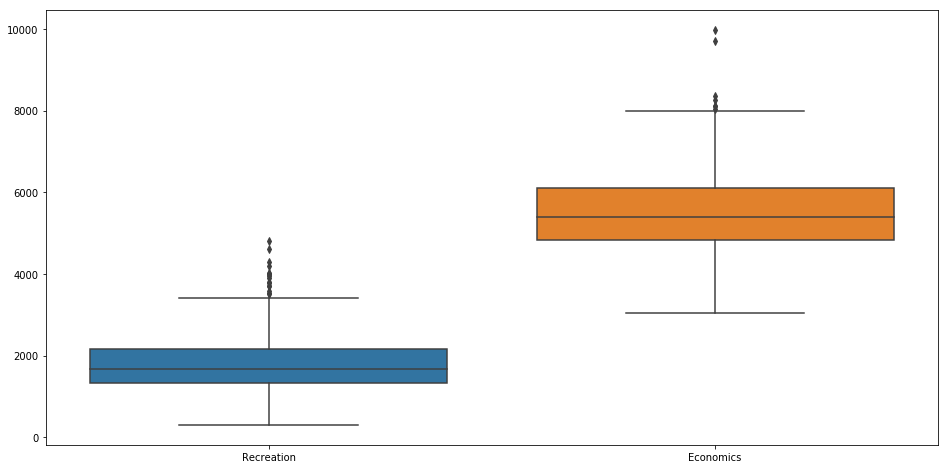

In [17]:
# Графики по числовым признакам без разбиения на классы
plt.figure(figsize=(16,8))
without_clases = df[[x for x in df if x not in ('Climate_and_Terrain', 'Housing','Health_Care_and_Environment', 'Crime', 'Transportation', 'Education', 'The_Arts')]]
sns.boxplot(data=without_clases);
plt.show()

<Figure size 864x432 with 0 Axes>

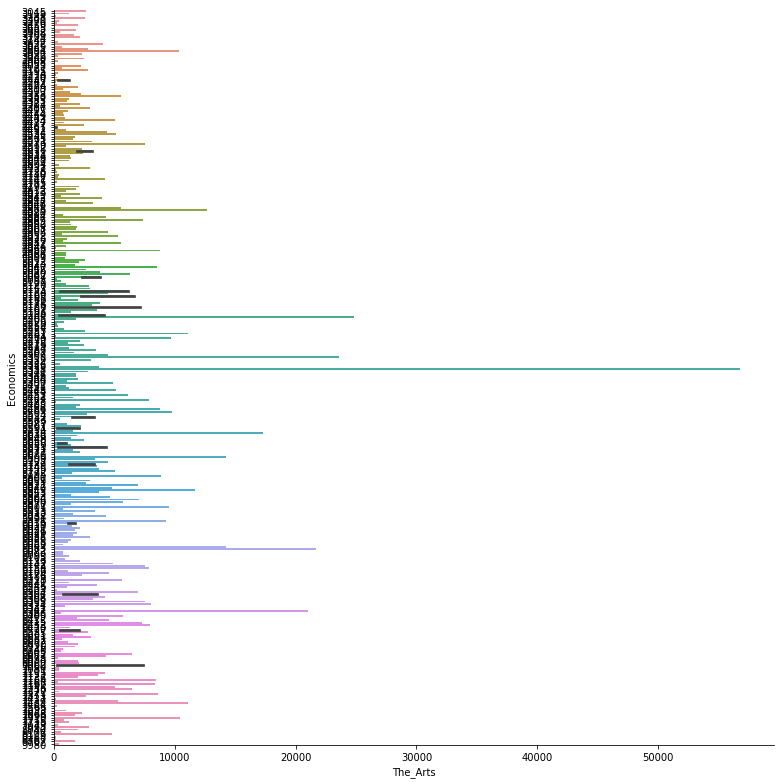

In [18]:
plt.figure(figsize=(12,6))
attack = df[[x for x in df if x not in ('Housing', 'Crime', 'Transportation', 'Education')]]
sns.catplot(x="The_Arts", y="Economics", data=attack, kind='bar', height=11, estimator=np.max);
plt.show()


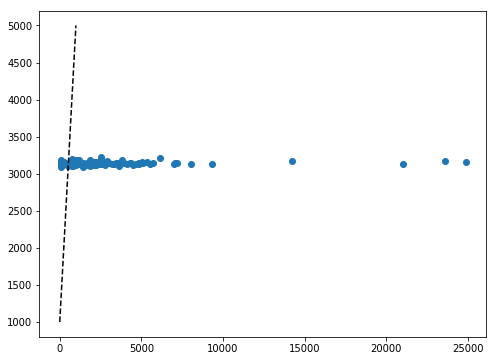

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(y_holdout, linreg.predict(X_holdout))
plt.plot([10, 1000], [1000, 5000], '--k')
plt.ticklabel_format(useOffset=False, style='plain')
plt.show()